In [1]:
from shot_detector import Shot_Detector
from utils import video_paths
import time
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
videos = video_paths('../data')

In [3]:
y_true = []
for vid in videos:
    if vid.split('/')[-2] == 'make':
        y_true.append(1)
    else:
        y_true.append(0)

In [4]:
def test_accuracy(step):
    y_pred = []

    start_time = time.time()
    for i in range(len(videos)):
        makes, _ = Shot_Detector(videos[i], step=step).run()
        y_pred.append(makes)
        end_time = time.time()
        execution_time = end_time - start_time
    
    accuracy = accuracy_score(y_true, y_pred)
    
    return accuracy, execution_time

In [5]:
accuracy, execution_time = test_accuracy(1)

In [6]:
print(accuracy, execution_time)

0.7611940298507462 195.86361694335938


In [7]:
accuracy_2, execution_time_2 = test_accuracy(2)

In [8]:
print(accuracy_2, execution_time_2)

0.8208955223880597 106.26099586486816


In [9]:
accuracy_3, execution_time_3 = test_accuracy(6)

In [10]:
print(accuracy_3, execution_time_3)

0.6268656716417911 47.39170575141907


In [11]:
step = [1, 2, 6]
accuracy = [accuracy, accuracy_2, accuracy_3]
execution_time = [execution_time, execution_time_2, execution_time_3]

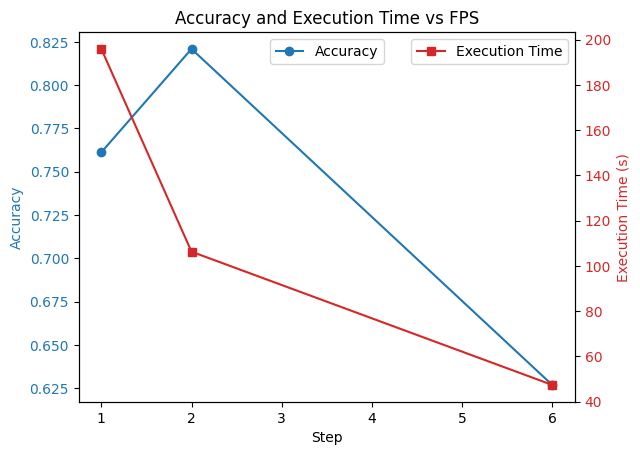

In [23]:
fig, ax1 = plt.subplots()

# plot accuracy
ax1.set_xlabel('Step')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(step, accuracy, color='tab:blue', marker='o', label='Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# plot execution time
ax2 = ax1.twinx()
ax2.set_ylabel('Execution Time (s)', color='tab:red')
ax2.plot(step, execution_time, color='tab:red', marker='s', label='Execution Time')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding title and legends
plt.title('Accuracy and Execution Time vs FPS')
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')

plt.savefig("plot_new")
plt.show()

# Conclusion

Interestingly, at a step of 2 there is a 6% compared to a step of 1, while execution time is nearly 100 seconds faster. This is likely due to a decrease in noise.

Looking at the outputs of the missclassified videos, there are commmon themes:
- Ball did not fully go through the net, so the algorithm did not detect a full shot
- Moving camera, not allowing the algorithm to track the ball/hoop well
- Camera angle that makes it seem like the ball went in as the ball falls closer/further than the rim but is still in between the ends of the rim

The position of the camera is crucial for the algorithm to have accurate classifications. Based on these results, the camera should be placed at an angle with the hoop to minimize situations where the ball is on target, but goes past/stops short of the rim.